![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

### 2. Preparación de datos

A continuación con el equipo trabajaremos en el análisis de los datos y su transformaciones correspondientes para que estos sean aptos para el modelo y así logral el objetivo, el cual es la clasificación de un paciente como hospitalizado o no hospitalizado.

Caso:['fue sometido a biopsia prostática' and 'En un periodo máximo de 30 días posteriores al procedimiento presentó: (fiebre' or 'infección urinaria' or 'Sepsis')];

Control:['fue sometido a biopsia prostática' and 'En un periodo máximo de 30 días posteriores al procedimiento NO presentó: (fiebre' or 'infección urinaria' or 'Sepsis')]

Importamos las librerías que usaremos a lo largo del proyecto

In [346]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from imblearn.over_sampling import ADASYN

Cargamos el archivo con los datos y visualizamos los primeros '3' elementos para tener una idea general del dataframe

In [347]:
dataHosp = pd.read_excel('BBDD_Hospitalización.xlsx')
dataHosp.head(3)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0


Debido a que nuestro trabajo es poder clasificar los campos que mas influyen en la hospitalizacion de una persona posteriormente de ser sometido a una biopsia prostatica, y también predecir según estos si el paciente será hospitalizado, con el equipo decidimos optar por eliminar las columnas ['DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC'] debido a que no aportan a nuestro análisis y modelado

In [348]:
dataHosp.drop(columns=['DIAS HOSPITALIZACION MQ','DIAS HOSPITALIZACIÓN UPC','AGENTE AISLADO'], inplace=True)

Verificamos si los campos tienen valores nulos

In [349]:
for column in dataHosp.columns:
    print(f'{column} presenta: {dataHosp[column].isna().sum()} valores nulos')

EDAD presenta: 2 valores nulos
DIABETES presenta: 2 valores nulos
HOSPITALIZACIÓN ULTIMO MES presenta: 2 valores nulos
PSA presenta: 6 valores nulos
BIOPSIAS PREVIAS presenta: 4 valores nulos
VOLUMEN PROSTATICO presenta: 3 valores nulos
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS presenta: 2 valores nulos
NUMERO DE MUESTRAS TOMADAS presenta: 2 valores nulos
CUP presenta: 3 valores nulos
ENF. CRONICA PULMONAR OBSTRUCTIVA presenta: 4 valores nulos
BIOPSIA presenta: 2 valores nulos
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA presenta: 2 valores nulos
FIEBRE presenta: 2 valores nulos
ITU presenta: 2 valores nulos
TIPO DE CULTIVO presenta: 2 valores nulos
PATRON DE RESISTENCIA presenta: 2 valores nulos
HOSPITALIZACION presenta: 5 valores nulos


Al ser pocos los nulos presentes en cada campo realizamos un histograma por campo para conocer la distribución de la variable, si existen valores atipicos y en función a esto computar los valores faltantes.

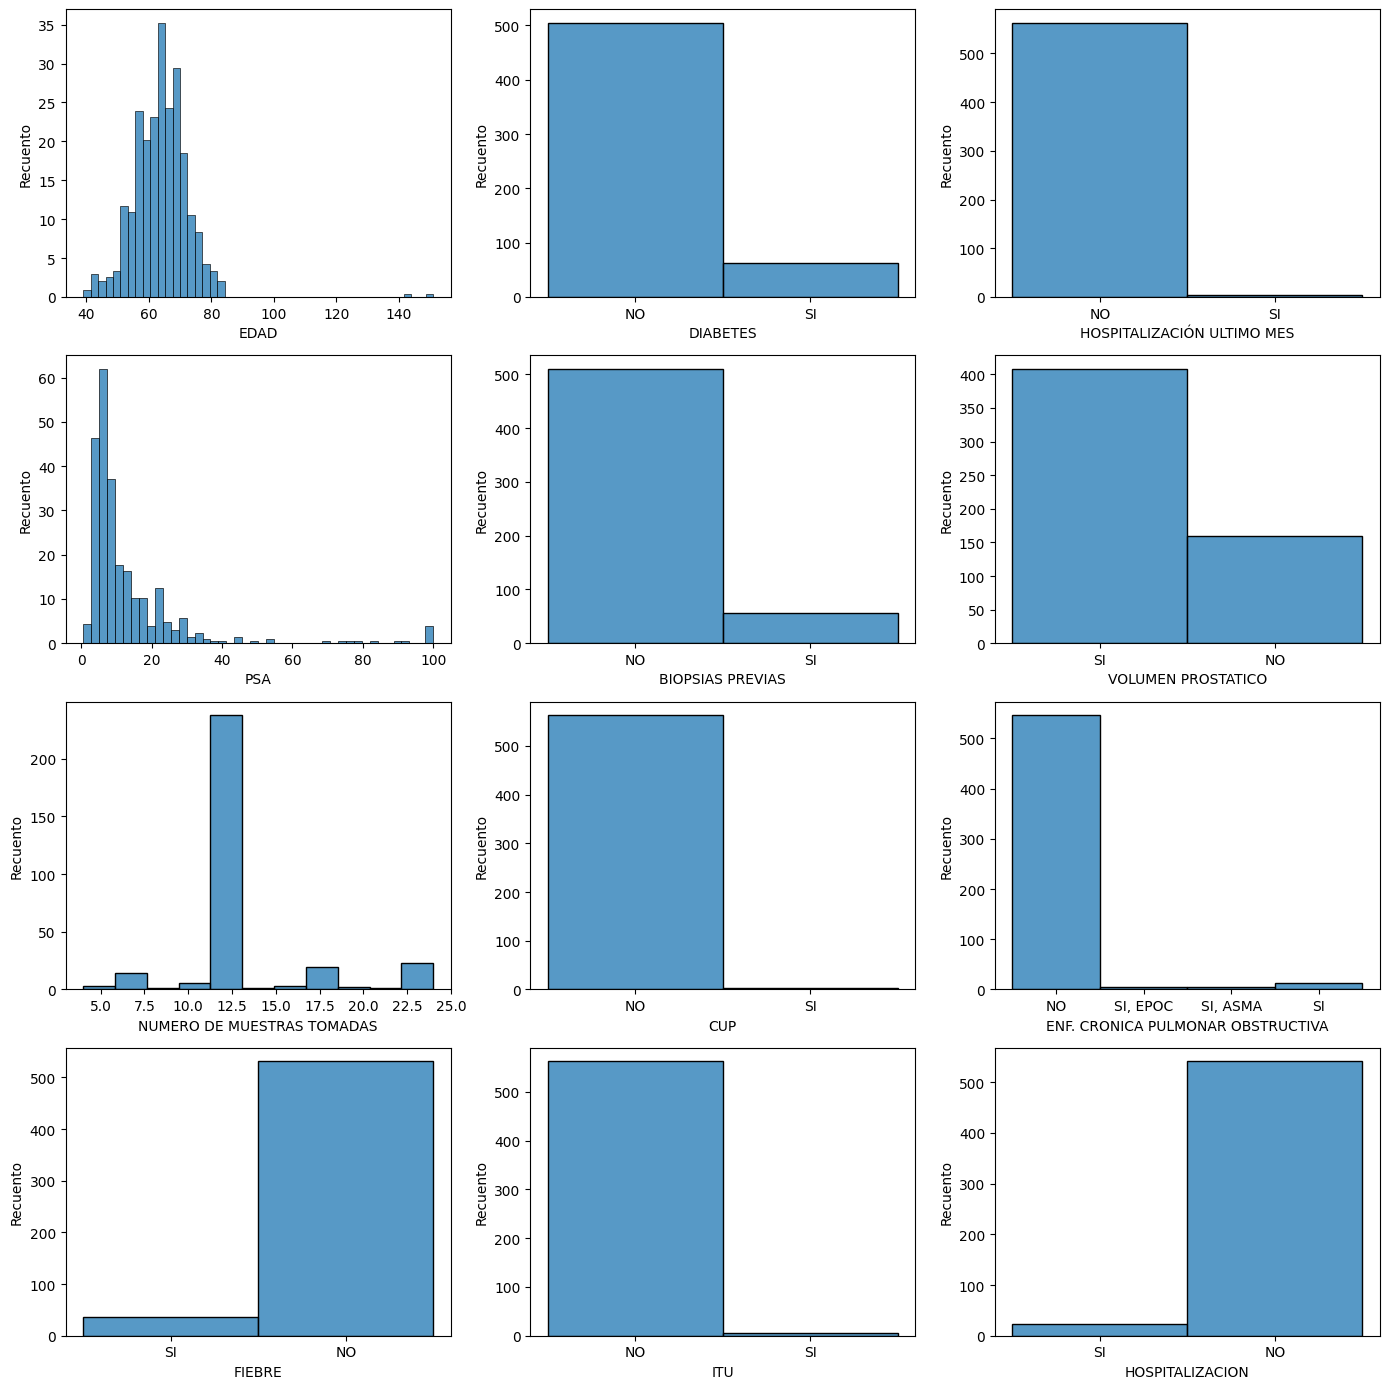

In [350]:
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
features = ['EDAD','DIABETES','HOSPITALIZACIÓN ULTIMO MES'],['PSA','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO'],['NUMERO DE MUESTRAS TOMADAS','CUP','ENF. CRONICA PULMONAR OBSTRUCTIVA'],['FIEBRE','ITU','HOSPITALIZACION']
for i in range(len(features)):
    for j in range(len(features[i])):
        ax = sns.histplot(dataHosp[features[i][j]], kde=False, stat='frequency', ax=axes[i][j])
        ax.set_ylabel('Recuento')

plt.tight_layout()  # Ajustar el espaciado entre los subplots
plt.show()  

Ya que queremos tener en ENF. CRONICA PULMONAR OBSTRUCTIVA solo SI o NO, vemos si afecta esto al target

In [351]:
dataHosp.loc[(dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'] != 'SI') & (dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'] != 'NO')]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,PATRON DE RESISTENCIA,HOSPITALIZACION
26,75.0,NO,NO,25.0,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
27,77.0,NO,NO,91.8,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO
28,75.0,NO,NO,21.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
29,77.0,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO
30,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO
31,63.0,NO,NO,10.8,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NaN
32,73.0,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO
33,63.0,NO,NO,10.5,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
566,67.0,NO,NO,8.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO
567,59.0,NO,NO,9.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO


Al no tener ningun target en estos datos normalizamos a SI y NO unicamente.
También podemos notar que las ultimas dos filas no contienen valores así que las eliminamos 

In [352]:
dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = dataHosp['ENF. CRONICA PULMONAR OBSTRUCTIVA'].str[0:2] #Nos quedamos con los primeros 2 caracteres [SI y No]
dataHosp.drop([568,569], inplace = True)

EDAD: Al tener una distribución normal podemos computar tanto los faltantes y los atípicos como la mediana de los valores menores a 100

In [353]:
mediana_edad = int(dataHosp['EDAD'].loc[dataHosp['EDAD'] < 100].median())
dataHosp.loc[(dataHosp['EDAD'] > 100) | (dataHosp['EDAD'].isna()), 'EDAD'] = mediana_edad

PSA: Debido a que el recuento de valores mayores a 40 es muy bajo, creemos que aquellos valores mayores a 85 son errores así que lo imputaremos con la media de los datos 

También al tener un sezgo positivo imputaremos los valores faltantes con la media de los datos

In [354]:
dataHosp.loc[(dataHosp['PSA'] == None) | (dataHosp['PSA'] > 85),'PSA'] = round(dataHosp['PSA'].mean(), 2)

A los campos que nos quedan no le podemos aplicar una metrica para llenar los nulos. Así que eliminamos estos

In [355]:
dataHosp.dropna(inplace = True, axis=0)

Transformamos las variables categoricas que contengan unicamente 'SI' y 'NO' a 1s y 0s para poder armar una matriz de correlación

In [356]:
categorical01 = ['DIABETES','HOSPITALIZACIÓN ULTIMO MES','BIOPSIAS PREVIAS','VOLUMEN PROSTATICO','CUP','ITU','ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE','HOSPITALIZACION']
for feature in categorical01:
    dataHosp[feature] = pd.Categorical(dataHosp[feature]).codes

Realizamos una matriz de correlación y nos quedamos con los campos que nos ayuden a explicar nuestro objetivo

In [362]:
mapa = dataHosp.corr(numeric_only = True)
mapa.style.background_gradient(cmap='coolwarm')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15512\3910277870.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mapa = dataHosp.corr()


TypeError: Styler.background_gradient() got an unexpected keyword argument 'numeric_only'

Obviaremos aquellas correlaciones muy cercanas a 0 y nos quedaremos con aquellas mayores a 0.030

In [358]:
features = ['EDAD','DIABETES','HOSPITALIZACIÓN ULTIMO MES','PSA','VOLUMEN PROSTATICO','NUMERO DE MUESTRAS TOMADAS','ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE','ITU']
X = dataHosp[features]
y = dataHosp['HOSPITALIZACION']

Pudimos observar en el histograma de Hospitalización que hay una gran diferencia en cuanto a la proporción, así que realizaremos un metodo de oversampling para igualar estas varibles y así entrenar nuestro modelo

In [359]:
#Instanciación del SMOTE
adasyn = ADASYN(random_state=42)
# Aplicar ADASYN al conjunto de datos desbalanceados
X_resampled, y_resampled = adasyn.fit_resample(X, y)
dataModel = pd.DataFrame(X_resampled, y_resampled)
dataModel.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,ENF. CRONICA PULMONAR OBSTRUCTIVA,FIEBRE,ITU
HOSPITALIZACION,,,,,,,,,
1,56.0,0,0,7.7,1,12.0,0,1,0
1,56.0,0,0,7.7,1,12.0,0,1,0
1,56.0,0,0,7.7,1,12.0,0,1,0
1,56.0,0,0,7.7,1,12.0,0,1,0
1,56.0,0,0,7.7,1,12.0,0,1,0


In [360]:
dataModel['DIABETES'].value_counts()

0    1066
Name: DIABETES, dtype: int64

Realizamos un 

KeyError: 'HOSPITALIZACIÓN'

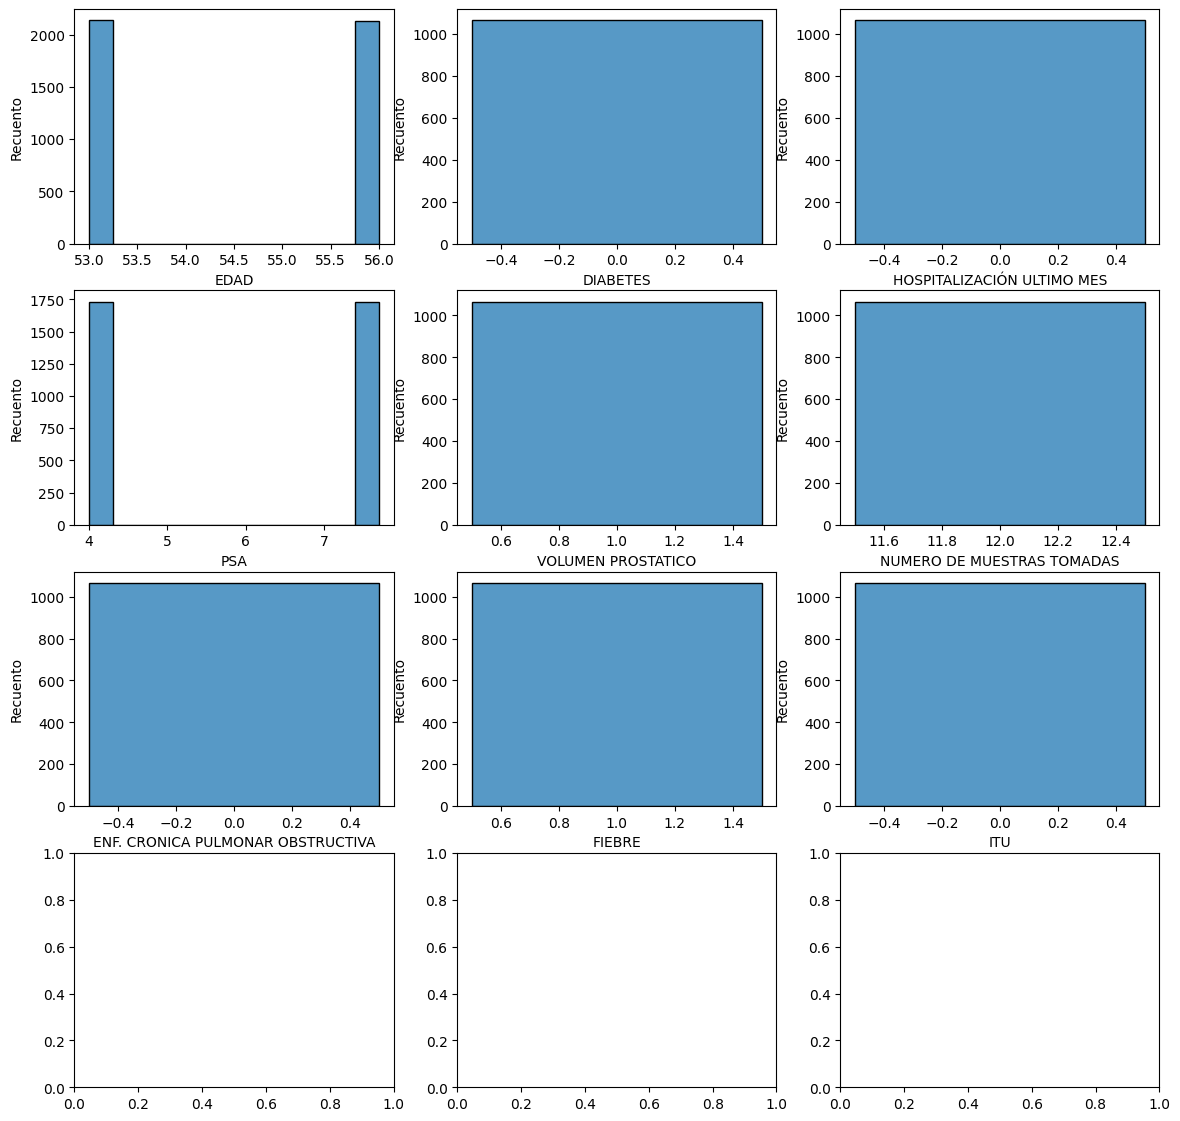

In [361]:
fig, axes = plt.subplots(4, 3, figsize=(14, 14))
features = [['EDAD','DIABETES','HOSPITALIZACIÓN ULTIMO MES'],['PSA','VOLUMEN PROSTATICO','NUMERO DE MUESTRAS TOMADAS'],['ENF. CRONICA PULMONAR OBSTRUCTIVA','FIEBRE','ITU'],['HOSPITALIZACIÓN']]
for i in range(len(features)):
    for j in range(len(features[i])):
        ax = sns.histplot(dataModel[features[i][j]], kde=False, stat='frequency', ax=axes[i][j])
        ax.set_ylabel('Recuento')

plt.tight_layout()  # Ajustar el espaciado entre los subplots
plt.show()  